# SPEECH EMOTION RECOGNITION
- In this project we used MLP classifier algorithm, librosa and sklearn libraries.
- we used RAVDESS dataset to analyze and recognize the emotions!

##  Import the necessary libraries


In [1]:
import os

In [2]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

### Define a function to extract features mfcc, chroma, and mel from a sound file
- mfcc= Mel Frequency Cepstral Coefficient, represents the short-term power spectrum of a sound
- chroma= Pertains to the 12 different pitch classes
- mel =  Mel Spectrogram Frequency


In [3]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [4]:
#Define a dictionary to hold numbers and emotions in ravdess dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

## Load the data and extract features for each sound file

In [5]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\Hp\\Downloads\\Ravdess_dataset\\speech-emotion-recognition\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

## Split the dataset

In [6]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [7]:
x_train[1:10]

array([[-6.41207336e+02,  4.49728851e+01, -1.83886874e+00, ...,
         3.89262023e-05,  3.05255780e-05,  2.94166712e-05],
       [-6.50698486e+02,  5.30313988e+01, -4.91021967e+00, ...,
         4.75216984e-05,  3.46632660e-05,  1.62844535e-05],
       [-6.88135132e+02,  7.49348984e+01, -2.51251984e+00, ...,
         5.26579515e-06,  2.36516053e-06,  1.05839104e-06],
       ...,
       [-7.35986145e+02,  3.38825951e+01,  6.34779024e+00, ...,
         4.01547841e-05,  2.72262150e-05,  1.34929014e-05],
       [-6.41012573e+02,  6.12088432e+01,  4.50762367e+00, ...,
         4.61663149e-06,  5.71309738e-06,  2.59131230e-06],
       [-4.64122589e+02,  4.98643608e+01, -2.19476166e+01, ...,
         2.70380580e-04,  1.72412358e-04,  1.15070514e-04]])

In [8]:
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [9]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


## MLP Classifier

In [10]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

## Fit/train the model

In [11]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [12]:
#Predict for the test set
y_pred=model.predict(x_test)

In [13]:
y_pred[1:10]

array(['calm', 'happy', 'happy', 'disgust', 'calm', 'calm', 'disgust',
       'disgust', 'happy'], dtype='<U7')

## Predict the accuracy of our model


In [14]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)


In [15]:
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 78.12%


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        calm       0.87      0.91      0.89        57
     disgust       0.76      0.77      0.76        48
     fearful       0.81      0.68      0.74        37
       happy       0.69      0.72      0.71        50

    accuracy                           0.78       192
   macro avg       0.78      0.77      0.77       192
weighted avg       0.78      0.78      0.78       192



In [17]:
from sklearn.metrics import accuracy_score, f1_score

In [18]:
f1_score(y_test, y_pred,average=None)

array([0.88888889, 0.7628866 , 0.73529412, 0.70588235])

In [19]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(20)

,Actual,Predicted
0,happy,happy
1,calm,calm
2,happy,happy
3,happy,happy
4,disgust,disgust
5,calm,calm
6,happy,calm
7,happy,disgust
8,disgust,disgust
9,happy,happy


In [20]:
from librosa import display
import matplotlib.pyplot as plt

In [21]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [22]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("C:/Users/Hp/Downloads/Ravdess_dataset/speech-emotion-recognition/Actor_02/03-01-01-01-02-02-02.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['calm'], dtype='<U7')

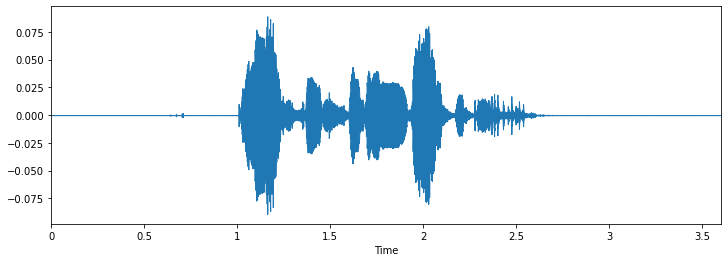

In [23]:
data, sampling_rate = librosa.load('C:/Users/Hp/Downloads/Ravdess_dataset/speech-emotion-recognition/Actor_02/03-01-01-01-02-02-02.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [24]:
feature

array([[-6.27870483e+02,  4.05996666e+01, -1.00877037e+01,
         4.48186827e+00, -1.13761034e+01, -3.27964234e+00,
        -1.40541925e+01, -7.21069622e+00, -5.68127537e+00,
        -4.05519867e+00, -6.52589989e+00, -6.07732296e+00,
        -2.64079547e+00, -6.94491816e+00, -2.31343722e+00,
        -4.49618530e+00, -2.89231348e+00, -3.35822953e-03,
        -7.41897285e-01, -9.91022527e-01, -2.56544018e+00,
        -1.25091374e-01, -1.87723625e+00,  1.59772873e+00,
         3.38146138e+00,  3.84696603e+00,  4.40000105e+00,
         3.18982005e+00,  2.33816338e+00,  7.54441977e-01,
        -1.24108863e+00,  3.29235721e+00,  4.03200006e+00,
         1.39738488e+00,  8.31668079e-01, -8.85033727e-01,
         3.89002323e-01, -1.98098402e-02,  2.55583711e-02,
        -1.74041951e+00,  5.38011968e-01,  5.47259510e-01,
         5.33583164e-01,  5.47456503e-01,  6.26992822e-01,
         6.57796264e-01,  6.66072786e-01,  6.65665746e-01,
         6.40713573e-01,  6.31792545e-01,  6.54239595e-0

In [25]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature2=extract_feature("C:/Users/Hp/Downloads/Ravdess_dataset/speech-emotion-recognition/Actor_01/03-01-06-02-02-01-01.wav", mfcc=True, chroma=True, mel=True)

feature2=feature2.reshape(1,-1)

prediction2=loaded_model.predict(feature2)
prediction2

array(['fearful'], dtype='<U7')

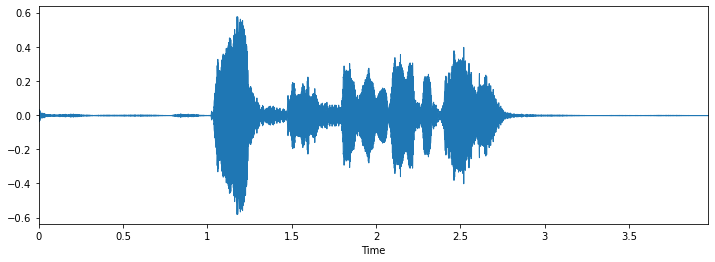

In [26]:
data, sampling_rate = librosa.load('C:/Users/Hp/Downloads/Ravdess_dataset/speech-emotion-recognition/Actor_01/03-01-06-02-02-01-01.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [27]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature3=extract_feature("C:/Users/Hp/Downloads/Ravdess_dataset/speech-emotion-recognition/Actor_23/03-01-08-02-02-01-23.wav", mfcc=True, chroma=True, mel=True)

feature3=feature3.reshape(1,-1)

prediction3=loaded_model.predict(feature2)
prediction3

array(['fearful'], dtype='<U7')

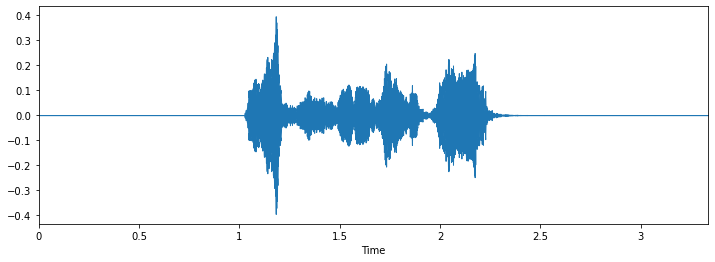

In [28]:
data, sampling_rate = librosa.load("C:/Users/Hp/Downloads/Ravdess_dataset/speech-emotion-recognition/Actor_23/03-01-08-02-02-01-23.wav")
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

[[52  3  1  1]
 [ 1 37  1  9]
 [ 3  3 25  6]
 [ 4  6  4 36]]


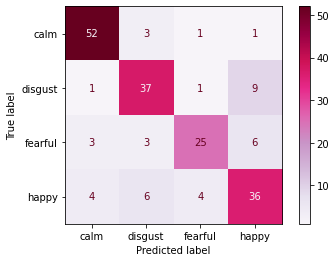

In [29]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print (matrix)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test, cmap=plt.cm.PuRd)
plt.show()